In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/drug review SA'

In [ ]:
df = pd.read_csv(PATH + '/data/results/clean_df.csv')

In [ ]:
df = df.drop(['review','rating','vader_polarity', 'Review_Sentiment','blob_polarity', 'class_2' ], axis = 1)

In [ ]:
df.head()

,cleaned_reviews,class
0,side effect take combination bystolic mg fish oil,neutral
1,son halfway fourth week intuniv become concern...,positve
2,use take another oral contraceptive pill cycle...,positve
3,first time use form birth control glad go patc...,positve
4,suboxone completely turn life around feel heal...,positve


In [ ]:
df['class'].value_counts()

positve     105433
negative    100071
neutral       9559
Name: class, dtype: int64

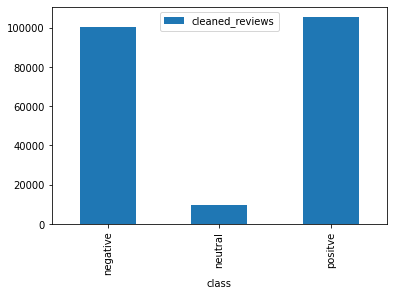

In [ ]:
df.groupby('class').count().plot.bar(ylim=0)
plt.show()

In [ ]:
df = df.dropna()

**Label encoder**

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder ()
df['class'] = label_encoder.fit_transform(df['class'].values)
df.head()


,cleaned_reviews,class
0,side effect take combination bystolic mg fish oil,1
1,son halfway fourth week intuniv become concern...,2
2,use take another oral contraceptive pill cycle...,2
3,first time use form birth control glad go patc...,2
4,suboxone completely turn life around feel heal...,2


**Train Test Split**

In [ ]:
df.cleaned_reviews =  df.cleaned_reviews.apply(str)

X = df['cleaned_reviews']
Y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#checking...
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('number of training data {}' .format(X_train.shape[0]))
print('number of training data {}' .format(X_test.shape[0]))


(172044,)
(43011,)
(172044,)
(43011,)
number of training data 172044
number of training data 43011


In [ ]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

**Model Development**

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import *

def model(classifier):
  model_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=12000, min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(classifier)),
            ])
  model_pipeline.fit(X_train, y_train)
  pipeline_prediction = model_pipeline.predict(X_test)
  accuracy = accuracy_score(pipeline_prediction, y_test)
  recall = recall_score(pipeline_prediction, y_test, average = 'micro')
  precision = precision_score(pipeline_prediction, y_test, average = 'micro')
  f1score = f1_score(pipeline_prediction, y_test, average = 'micro')
  print('accuracy %s' % accuracy)
  print('recall %s' % recall)
  print('precision %s' % precision)
  print('f1 score %s' % f1score )
  return model_pipeline, accuracy, recall, precision, f1score

**SGD classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier
SGD_model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD = model(SGD_model)

accuracy 0.860105554393062
recall 0.858207214495072
precision 0.870204254698014
f1 score 0.865401112415348


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(multi_class='ovr',solver='liblinear',C=1,random_state=42,tol=0.0001,max_iter=300)
LR = model(LR_model)

accuracy 0.8962823463765084
recall 0.898123346753519
precision 0.899922303203536
f1 score 0.89631403202406


**RandomForest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,criterion ='entropy')
RF = model(RF_model)

accuracy 0.932970635418846
recall 0.923940675415871
precision 0.945970569415472
f1 score 0.93690558245463


**SVC**

In [ ]:
from sklearn.svm import SVC
SVC_model = SVC(random_state=42,kernel='rbf')
SVC = model(SVC_model)

accuracy 0.906557246353974
recall 0.90114503246536
precision 0.89997426748701
f1 score 0.89774103202118


**Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAG_model = PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
PAG = model(PAG_model)

accuracy 0.9039780521262
recall 0.9000879522584
precision 0.9090802242575
f1 score 0.9041168242479


**Score Comparison**

In [ ]:
SGD_acc = SGD[1]
SGD_rec = SGD[2]
SGD_pre = SGD[3]
SGD_f1 = SGD[4]

LR_acc = LR[1]
LR_rec = LR[2]
LR_pre = LR[3]
LR_f1 = LR[4]

RF_acc = RF[1]
RF_rec = RF[2]
RF_pre = RF[3]
RF_f1 = RF[4]

SVC_acc = SVC[1]
SVC_rec = SVC[2]
SVC_pre = SVC[3]
SVC_f1 = SVC[4]

PAG_acc = PAG[1]
PAG_rec = PAG[2]
PAG_pre = PAG[3]
PAG_f1 = PAG[4]


In [ ]:
models = pd.DataFrame({
                      'Algorithm': ['SGD', 'LR', 'SVC', 'RF', 'PAG'],
                       'Accuracy': [SGD_acc, LR_acc, SVC_acc, RF_acc, PAG_acc],
                       'Precision': [SGD_pre, LR_pre, SVC_pre, RF_pre, PAG_pre],
                       'Recall': [SGD_rec, LR_rec, SVC_rec, RF_rec, PAG_rec],
                       'F1 score': [SGD_f1, LR_f1, SVC_f1, RF_f1, PAG_f1],
                       })
models.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 score
1,RF,0.932971,0.923941,0.945971,0.936906
3,SVC,0.906557,0.899974,0.901145,0.897741
4,PAG,0.903978,0.900088,0.909080,0.904117
2,LR,0.896282,0.898123,0.899922,0.896314
0,SGD,0.860106,0.870204,0.858207,0.865401


**Barchart Imported From Excel**

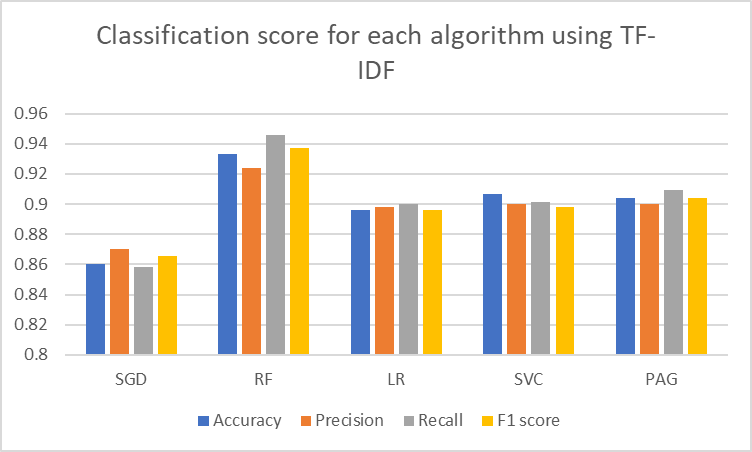

**ROC AUC Curve For Highest Performing Classifier**

In [ ]:
def plot_multiclass_roc(name, clf, X_test, y_test, n_classes=3, figsize=(10, 8)):
    y_score = clf.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    AUC = roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.2])
    ax.set_xlabel('False Positive Rate',fontsize=20)
    ax.set_ylabel('True Positive Rate',fontsize=20)
    plt.tick_params(axis='x',rotation=0,labelsize=12)
    plt.tick_params(axis='y',rotation=0,labelsize=12)
    ax.set_title('ROC curve for {} \n AUC Sore {}'.format(name, AUC ),fontsize=20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best",prop={'size': 20})
    ax.grid(alpha=.4)
    sns.despine()

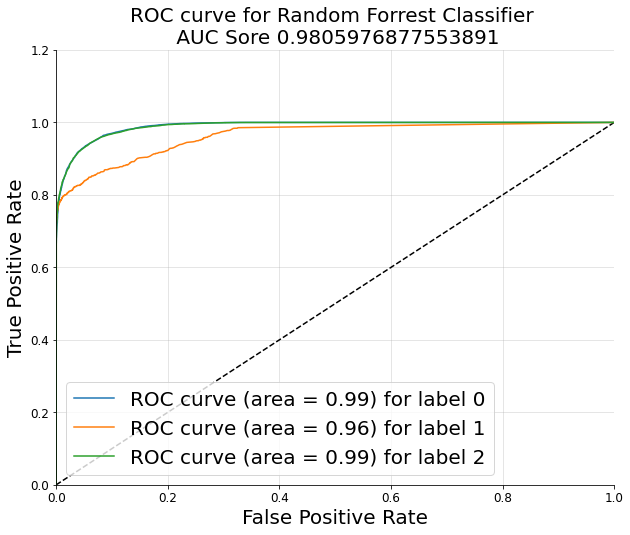

In [ ]:
# ROC AUC curve for Random Forrest
plot_multiclass_roc('Random Forrest Classifier',RF[0], X_test, y_test)

**Confusion Matrix for Highest Performing Classifier**

In [ ]:
def conf_matrix(clf,classfier):
  pred = clf.predict(X_test)
  predictions = pred
  y_pred = np.array(predictions)
  cm = confusion_matrix(y_test, y_pred) 

  cm_df = pd.DataFrame(cm,
                       index = ['negative', 'neutral', 'positive'], 
                       columns = ['negative', 'neutral', 'positive'])
  plt.figure(figsize=(8,6))
  sns.heatmap(cm_df, annot=True,cmap="OrRd", fmt='g')
  plt.title('\n'+classfier+' Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
  plt.ylabel('True label',fontsize=20)
  plt.xlabel('Predicted label',fontsize=20)
  plt.tick_params(rotation=0,axis='y', labelsize=15)
  plt.tick_params(rotation=0,axis='x', labelsize=15)
  plt.xticks(rotation = 0)
  plt.yticks(rotation = 90)
  plt.show()
  plt.close()

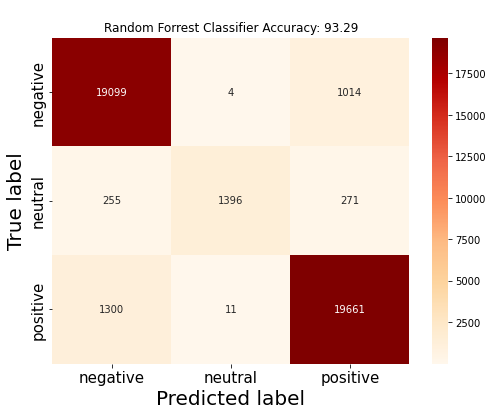

In [ ]:
## Confusion Matrix of Random Forrest classifier (best perfomed model)
conf_matrix(RF[0], 'Random Forrest Classifier')

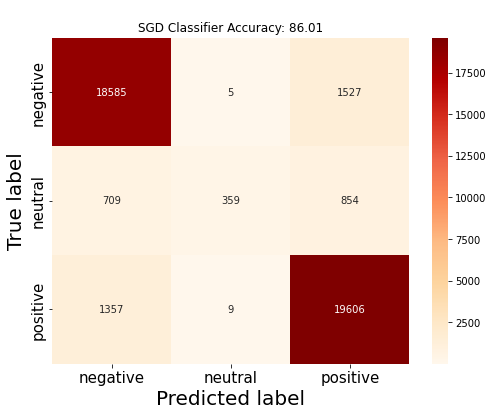

In [ ]:
# Confusion Matrix of SGD classifier (Worst performing model)
conf_matrix(SGD[0], 'SGD Classifier')